In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn import metrics

import joblib
import warnings 

warnings.filterwarnings('ignore')
plt.style.use('seaborn')
sns.set_theme()

# Importing the dataset

In [2]:
path = "../ML-Car_recommend/CAR DETAILS FROM CAR DEKHO.csv"
df_cars1_data = pd.read_csv(path)
df_cars1_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
path = "../ML-Car_recommend/Car details v3.csv"
df_cars2_data = pd.read_csv(path)
df_cars2_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# Data Explorating and Data Preprocessing

In [4]:
df_cars1 = df_cars1_data[['year','selling_price','km_driven','fuel','owner']]
df_cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4340 non-null   int64 
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   owner          4340 non-null   object
dtypes: int64(3), object(2)
memory usage: 169.7+ KB


In [5]:
df_cars2 = df_cars2_data[['year','selling_price','km_driven','fuel','owner']]
df_cars2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           8128 non-null   int64 
 1   selling_price  8128 non-null   int64 
 2   km_driven      8128 non-null   int64 
 3   fuel           8128 non-null   object
 4   owner          8128 non-null   object
dtypes: int64(3), object(2)
memory usage: 317.6+ KB


In [6]:
listdf = [df_cars2,df_cars1]
df = pd.concat(listdf)
df = df.dropna(how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12468 entries, 0 to 4339
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           12468 non-null  int64 
 1   selling_price  12468 non-null  int64 
 2   km_driven      12468 non-null  int64 
 3   fuel           12468 non-null  object
 4   owner          12468 non-null  object
dtypes: int64(3), object(2)
memory usage: 584.4+ KB


In [7]:
print(set (df['fuel']))
print(set (df['owner']))

{'LPG', 'Diesel', 'Electric', 'Petrol', 'CNG'}
{'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'}


# Encode Categorical Data and Visualization Data

In [8]:
dict_fuel = {'CNG': 1 , 'LPG' : 2 ,'Diesel' :3 ,'Petrol':4 , 'Electric':5}
df['fuel'] = df['fuel'].map(dict_fuel)
dict_owner = {'Third Owner': 1 , 'Fourth & Above Owner' : 2 ,'Test Drive Car' :3 ,'First Owner':4 , 'Second Owner':5}
df['owner'] = df['owner'].map(dict_owner)
df.head(4)

,year,selling_price,km_driven,fuel,owner
0,2014,450000,145500,3,4
1,2014,370000,120000,3,5
2,2006,158000,140000,4,1
3,2010,225000,127000,3,4


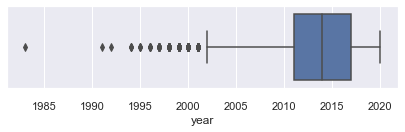

In [9]:
fig, axs = plt.subplots(figsize = (7,1.5))
sns.boxplot(data=df , x='year');

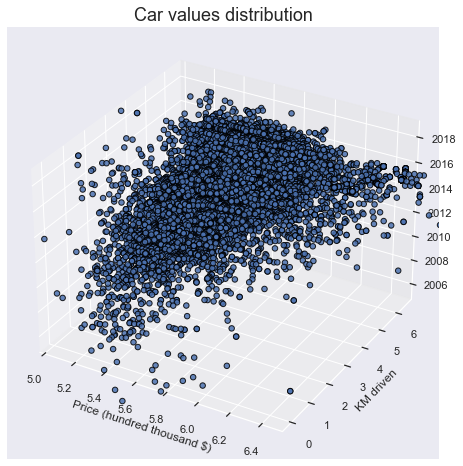

In [10]:
from mpl_toolkits import mplot3d

df_np = np.array(df)

fig = plt.figure(figsize=(6,6))
ax = mplot3d.Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.set_title('Car values distribution',size = 18)
ax.scatter3D(np.log10(df_np[0:,1]),np.log10(df_np[0:,2]),df_np[0:,0], edgecolor='black',alpha = 0.85,s=30)
ax.set_xlim(5,6.5)
ax.set_zlim(2005,2019)
ax.set_xlabel('Price (hundred thousand $)',fontsize = 12)
ax.set_ylabel('KM driven',fontsize = 12);

# Training, Building model

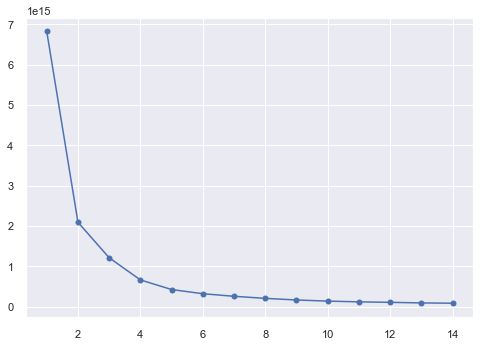

In [11]:
distance = []
K = range (1,15)
for k in K : 
    k_mean = KMeans(n_clusters=k)
    k_mean.fit(df)
    distance.append(k_mean.inertia_)
plt.plot(K,distance,marker='o');

In [12]:
k_mean_4 = KMeans(n_clusters=4)
model = k_mean_4.fit(df)
result = k_mean_4.labels_
df.head()

,year,selling_price,km_driven,fuel,owner
0,2014,450000,145500,3,4
1,2014,370000,120000,3,5
2,2006,158000,140000,4,1
3,2010,225000,127000,3,4
4,2007,130000,120000,4,4


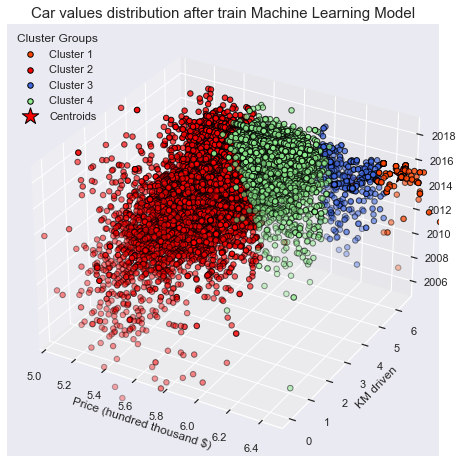

In [13]:
fig = plt.figure(figsize=(6,6))
ax = mplot3d.Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)


ax.scatter3D(
    np.log10(df_np[result == 0,1]),np.log10(df_np[result == 0, 2]),df_np[result == 0,0],
    c='orangered',s=30,
    edgecolor='black',
    label='Cluster 1'
)
ax.scatter3D(
    np.log10(df_np[result == 1,1]),np.log10(df_np[result == 1, 2]),df_np[result == 1,0],
    c='red',s=30,
    marker='o', edgecolor='black',
    label='Cluster 2'
)
ax.scatter3D(
    np.log10(df_np[result == 2,1]),np.log10(df_np[result == 2, 2]),df_np[result == 2,0],
    c='royalblue',s=30,
    edgecolor='black',
    label='Cluster 3'
)
ax.scatter3D(
    np.log10(df_np[result == 3,1]),np.log10(df_np[result == 3, 2]),df_np[result == 3,0],
    c='lightgreen',s=30,
    edgecolor='black',
    label='Cluster 4'
)


ax.scatter3D(
    np.log10(model.cluster_centers_[:, 1]),np.log10(model.cluster_centers_[:, 2]),model.cluster_centers_[:, 0],
    s=300,marker='*',
    c='red', edgecolor='black',
    label='Centroids'
)

ax.set_xlabel('Price (hundred thousand $)',fontsize = 12)
ax.set_ylabel('KM driven',fontsize = 12)
ax.set_xlim(5,6.5)
ax.set_zlim(2005,2019)

ax.set_title('Car values distribution after train Machine Learning Model',size = 15)
plt.legend(scatterpoints=1,loc = 'upper left',title='Cluster Groups');


## SAVE MODEL

In [14]:
joblib.dump(model,'Model Cars_recommend.sav')

['Model Cars_recommend.sav']

# Predict data

In [15]:
list_nameCar = [df_cars1_data['name'],df_cars2_data['name']]
df['Car_name'] = list (pd.concat(list_nameCar))
first_column = df.pop('Car_name')
df.insert(0, 'Car_name', first_column)

df_cars1_data['cluster'] = result[0:4340]
df_cars2_data['cluster']= result[4340:]

In [16]:
def recommend (year,sellling_price,km_driven,fuel,owner):
    import joblib
    model = joblib.load('Model Cars_recommend.sav')
    array_value = np.array([[year,sellling_price,km_driven,fuel,owner]])
    pred = model.predict(array_value)
    return df_cars1_data[df_cars1_data['cluster']==pred[0]].sample(5),df_cars2_data[df_cars2_data['cluster']==pred[0]].sample(5)

* **fuel :** 'CNG': 1 , 'LPG' : 2 ,'Diesel' :3 ,'Petrol':4 , 'Electric':5
* **Owner:** 'Third Owner': 1 , 'Fourth & Above Owner' : 2 ,'Test Drive Car' :3 ,'First Owner':4 , 'Second Owner':5

In [17]:
## Nhập thông số cho gợi ý 
year = 2013
price = 300000
km_driven = 150000
fuel = 3 
owner = 4

a,b = recommend(2013,300000,150000,3,4)

In [18]:
a

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,cluster
776,Maruti Swift VDI,2012,450000,46000,Diesel,Individual,Manual,First Owner,1
995,Tata Indica LSI,2006,70000,60000,Petrol,Individual,Manual,Second Owner,1
2494,Hyundai i20 1.2 Era,2010,250000,34500,Petrol,Individual,Manual,Second Owner,1
2360,Renault KWID Climber 1.0 MT Opt BSIV,2020,541000,1000,Petrol,Dealer,Manual,Test Drive Car,1
2225,Ford EcoSport 1.5 Diesel Titanium Plus BSIV,2018,930000,20000,Diesel,Individual,Manual,First Owner,1


In [19]:
b

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,cluster
5874,Renault KWID AMT,2018,400000,30000,Petrol,Individual,Automatic,Second Owner,24.04 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0,1
8076,Maruti Wagon R LXI BSIII,2006,150000,50000,Petrol,Individual,Manual,Third Owner,14.0 kmpl,1061 CC,64 bhp,"8.6@ 3,500(kgm@ rpm)",5.0,1
472,Tata Indica Vista Aqua 1.4 TDI,2011,200000,110000,Diesel,Individual,Manual,Second Owner,17.0 kmpl,1405 CC,71 bhp,135 Nm at 2500 rpm,5.0,1
5885,Maruti Alto LXi,2011,122000,110000,Petrol,Individual,Manual,Fourth & Above Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0,1
4563,Maruti Esteem Vxi - BSIII,2005,93000,80000,Petrol,Individual,Manual,Third Owner,15.9 kmpl,1298 CC,85 bhp,110Nm@ 4500rpm,5.0,1
